/var/folders/1p/h1qfnx2d6ps1y_cqnnphbg_00000gn/T/ipykernel_2014/514992432.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


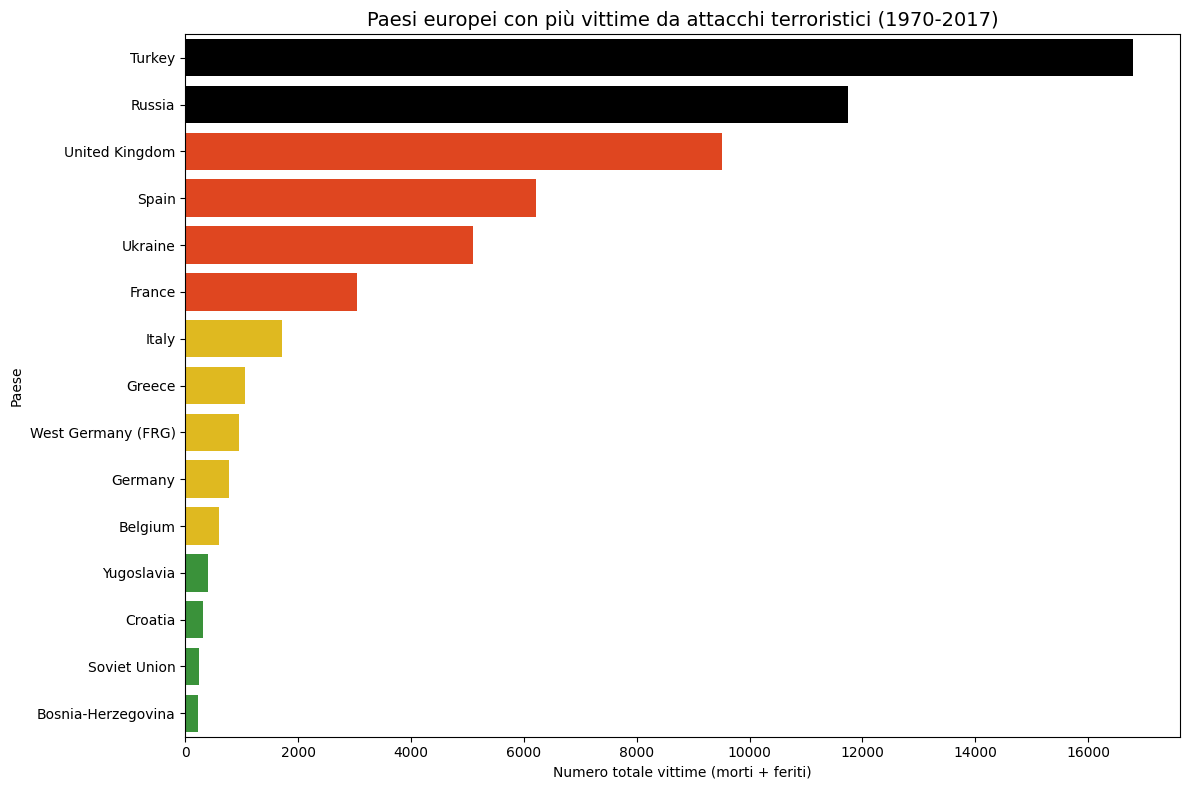

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 1. Percorsi dei file
base_path = Path().resolve().parents[1]
data_path = base_path / 'data' / 'globalterrorismdb.csv'

# 2. Carica i dati
df = pd.read_csv(data_path, encoding='latin1', low_memory=False)

# 3. Prepara i dati
df['nkill'] = df['nkill'].fillna(0)
df['nwound'] = df['nwound'].fillna(0)
df['vittime'] = df['nkill'] + df['nwound']

# 4. Lista paesi europei incl. storici
european_countries = [
    'Russia', 'United Kingdom', 'Spain', 'France', 'Germany', 'Italy', 'Turkey',
    'Ireland', 'Greece', 'Belgium', 'Ukraine', 'Poland', 'Portugal', 'Sweden',
    'Norway', 'Denmark', 'Finland', 'Netherlands', 'Austria', 'Switzerland',
    'Czech Republic', 'Slovakia', 'Hungary', 'Romania', 'Bulgaria', 'Serbia',
    'Croatia', 'Bosnia-Herzegovina', 'Slovenia', 'Macedonia', 'Albania',
    'Lithuania', 'Latvia', 'Estonia', 'Belarus', 'Moldova', 'Luxembourg',
    'Iceland', 'Malta', 'Cyprus',
    'West Germany (FRG)', 'East Germany (GDR)',
    'Yugoslavia', 'Czechoslovakia', 'Soviet Union', 'Serbia-Montenegro'
]

# 5. Filtra e aggrega
europe = df[df['country_txt'].isin(european_countries)]

victims_per_country = (europe
    .groupby('country_txt')['vittime']
    .sum()
    .reset_index()
    .sort_values('vittime', ascending=False)
)

# 6. Funzione colori e grafico
def color_scale(v):
    if v <= 500: return '#2ca02c'
    elif v <= 3000: return '#ffcc00'
    elif v <= 10000: return '#ff3300'
    else: return '#000000'

colors = [color_scale(v) for v in victims_per_country.head(15)['vittime']]

plt.figure(figsize=(12, 8))
sns.barplot(
    data=victims_per_country.head(15),
    x='vittime',
    y='country_txt',
    palette=colors
)

plt.title('Paesi europei con più vittime da attacchi terroristici (1970-2017)', fontsize=14)
plt.xlabel('Numero totale vittime (morti + feriti)')
plt.ylabel('Paese')
plt.tight_layout()
plt.show()

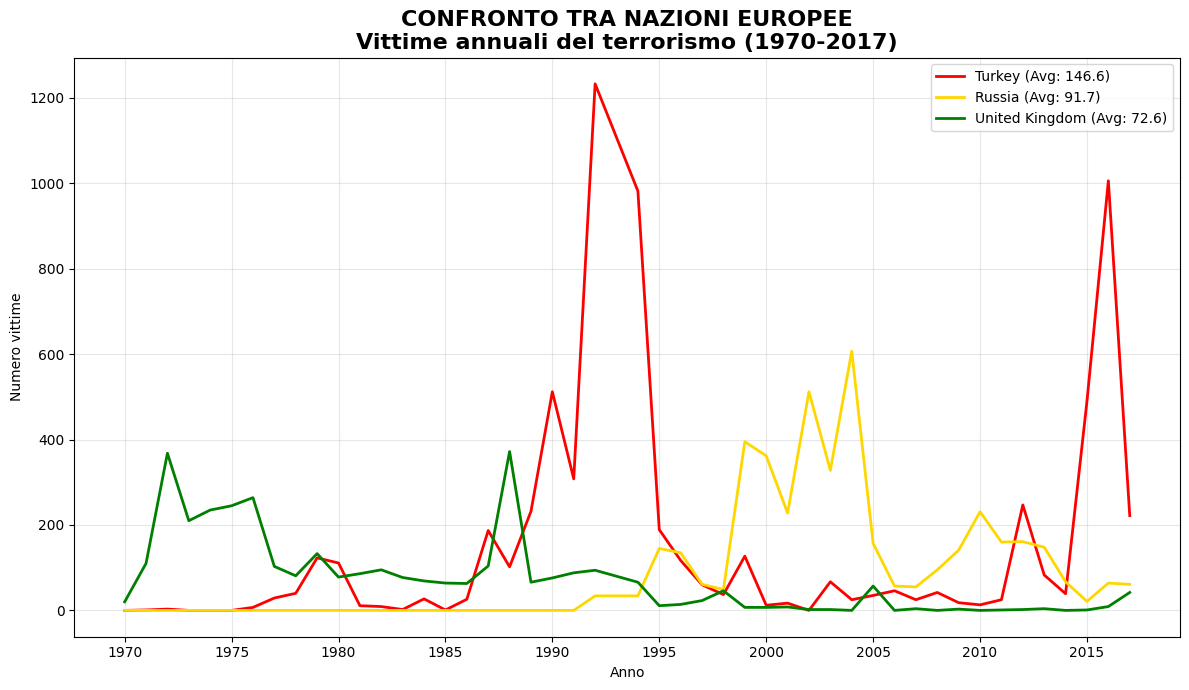

In [36]:
# --- Ricarico i dati per le modifiche che ha subito prima il csv ---
base_path = Path().resolve().parents[1]
data_path = base_path / 'data' / 'globalterrorismdb.csv'


df = pd.read_csv(data_path, encoding='latin1', low_memory=False)

# --- Filtra colonne utili ---

df = df[['iyear', 'country_txt', 'nkill']]
df = df.dropna(subset=['nkill'])

# --- Filtra per i 3 paesi top in Europa ---
countries = ['Turkey', 'Russia', 'United Kingdom']
df = df[df['country_txt'].isin(countries)]

# --- Aggrega: vittime totali per anno e paese ---
grouped = df.groupby(['iyear', 'country_txt'])['nkill'].sum().reset_index()

# --- Pivot per avere colonne per paese ---
pivot = grouped.pivot(index='iyear', columns='country_txt', values='nkill').fillna(0)

# --- Calcola le medie per la legenda ---
avg_turkey = pivot['Turkey'].mean()
avg_russia = pivot['Russia'].mean()
avg_uk = pivot['United Kingdom'].mean()

# --- Plot ---
plt.figure(figsize=(12,7))

plt.plot(pivot.index, pivot['Turkey'], color='red', label=f'Turkey (Avg: {avg_turkey:.1f})', linewidth=2)
plt.plot(pivot.index, pivot['Russia'], color='gold', label=f'Russia (Avg: {avg_russia:.1f})', linewidth=2)
plt.plot(pivot.index, pivot['United Kingdom'], color='green', label=f'United Kingdom (Avg: {avg_uk:.1f})', linewidth=2)

plt.title("CONFRONTO TRA NAZIONI EUROPEE\nVittime annuali del terrorismo (1970-2017)", fontsize=16, weight='bold')
plt.xlabel("Anno")
plt.xticks(range(1970, 2020, 5))
plt.ylabel("Numero vittime")
plt.legend()

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/1p/h1qfnx2d6ps1y_cqnnphbg_00000gn/T/ipykernel_2014/3067191486.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('RdYlGn_r')  # scala dal verde (pochi) al rosso (tanti)


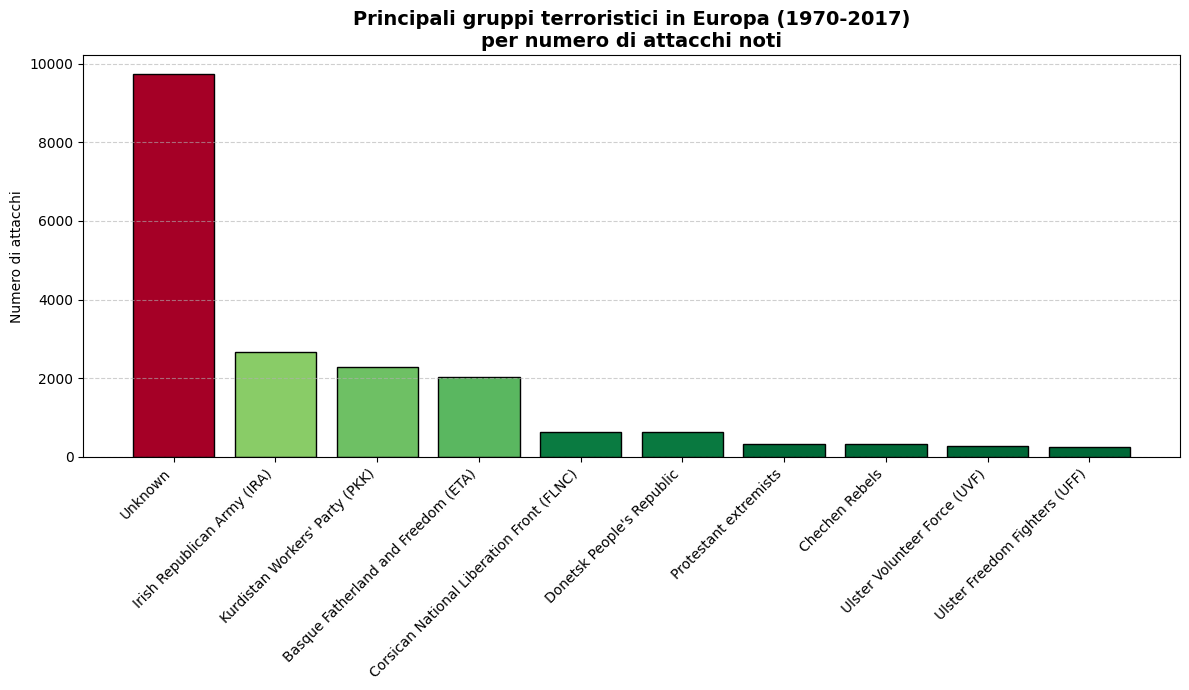

In [37]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# --- Ricarico i dati per le modifiche che ha subito prima il csv ---
base_path = Path().resolve().parents[1]
data_path = base_path / 'data' / 'globalterrorismdb.csv'


df = pd.read_csv(data_path, encoding='latin1', low_memory=False)

# --- Filtra colonne utili ---
df = df[['country_txt', 'gname']]

df = df[df['country_txt'].isin(european_countries)]

# --- Conta numero di attacchi per gruppo ---
group_counts = df.groupby('gname').size().reset_index(name='attacchi')
group_counts = group_counts.sort_values('attacchi', ascending=False)

# --- Prendi i top 10 gruppi ---
top_groups = group_counts.head(10)

# --- Prepara i colori (gradiente da verde a rosso) ---
norm = mcolors.Normalize(vmin=top_groups['attacchi'].min(), vmax=top_groups['attacchi'].max())
cmap = cm.get_cmap('RdYlGn_r')  # scala dal verde (pochi) al rosso (tanti)

colors = [cmap(norm(value)) for value in top_groups['attacchi']]

# --- Plot ---
plt.figure(figsize=(12,7))
bars = plt.bar(top_groups['gname'], top_groups['attacchi'], color=colors, edgecolor='black')

plt.ylabel('Numero di attacchi')
plt.title('Principali gruppi terroristici in Europa (1970-2017)\nper numero di attacchi noti', fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [28]:
# --- Ricarico i dati per le modifiche che ha subito prima il csv ---
base_path = Path().resolve().parents[1]
data_path = base_path / 'data' / 'globalterrorismdb.csv'

df = pd.read_csv(data_path, encoding='latin1', low_memory=False)

# Filtra Beslan (Russia, 2004)
beslan = df[
    (df['country_txt'] == 'Russia') &
    (df['city'].str.lower() == 'beslan') &
    (df['iyear'] == 2004)
]

# Numero di attacchi registrati
num_attacks = len(beslan)

# Totale morti, feriti e vittime
tot_killed = beslan['nkill'].sum()
tot_wounded = beslan['nwound'].sum()
tot_victims = tot_killed + tot_wounded

print(f"Attacco/i a Beslan (Russia, 2004):")
print(f" - Numero di attacchi registrati: {num_attacks}")
print(f" - Totale morti: {tot_killed}")
print(f" - Totale feriti: {tot_wounded}")
print(f" - Totale vittime complessive (morti + feriti): {tot_victims}")

Attacco/i a Beslan (Russia, 2004):
 - Numero di attacchi registrati: 1
 - Totale morti: 344.0
 - Totale feriti: 727.0
 - Totale vittime complessive (morti + feriti): 1071.0


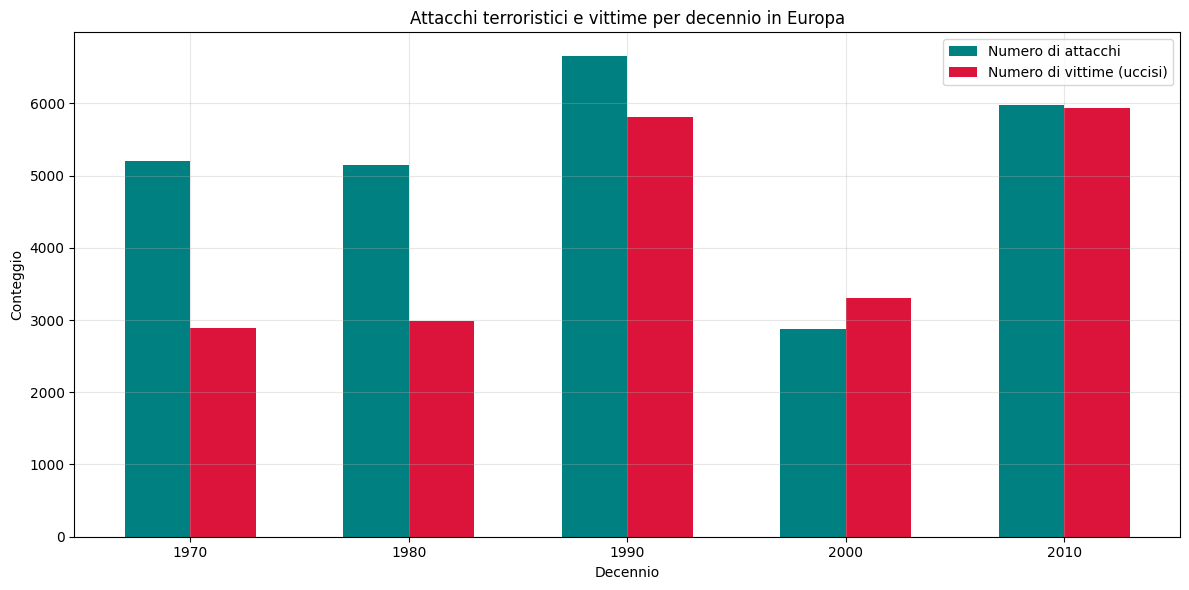

In [30]:
# --- Ricarico i dati per le modifiche che ha subito prima il csv ---
base_path = Path().resolve().parents[1]
data_path = base_path / 'data' / 'globalterrorismdb.csv'

df = pd.read_csv(data_path, encoding='latin1', low_memory=False)

# --- Filtra colonne utili ---
df = df[['iyear', 'country_txt', 'nkill']]

df = df[df['country_txt'].isin(european_countries)]

# --- Crea colonna decennio ---
df['decade'] = (df['iyear'] // 10) * 10

# --- Numero di attacchi per decennio ---
attacks_per_decade = df['decade'].value_counts().sort_index()

# --- Numero di vittime per decennio ---
victims_per_decade = df.groupby('decade')['nkill'].sum()

# --- Plot ---
plt.figure(figsize=(12,6))

# Bar width
width = 3

plt.bar(attacks_per_decade.index - width/2, attacks_per_decade.values, 
        width=width, color='teal', label='Numero di attacchi')

plt.bar(victims_per_decade.index + width/2, victims_per_decade.values, 
        width=width, color='crimson', label='Numero di vittime (uccisi)')

plt.xlabel('Decennio')
plt.ylabel('Conteggio')
plt.title('Attacchi terroristici e vittime per decennio in Europa')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

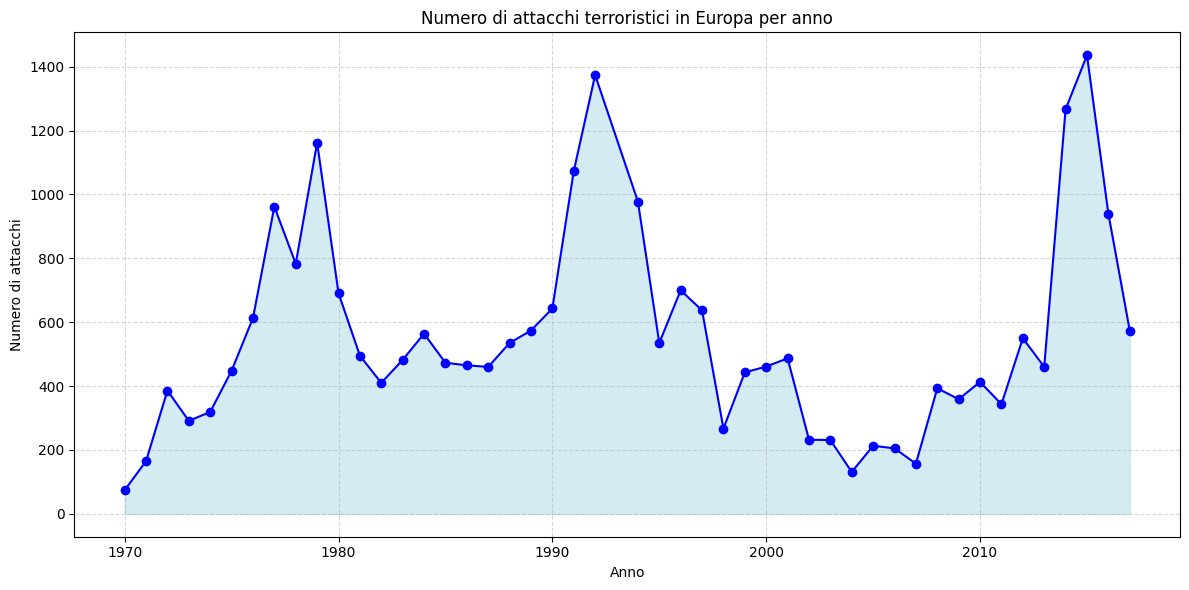

In [43]:
import matplotlib.pyplot as plt

# --- Ricarico i dati per le modifiche che ha subito prima il csv ---
base_path = Path().resolve().parents[1]
data_path = base_path / 'data' / 'globalterrorismdb.csv'

df = pd.read_csv(data_path, encoding='latin1', low_memory=False)

df_europe = df[df['country_txt'].isin(european_countries)]

# Conta attacchi per anno
attacks_per_year = df_europe['iyear'].value_counts().sort_index()

# Plot stile area + linea
plt.figure(figsize=(12,6))

plt.fill_between(attacks_per_year.index, attacks_per_year.values, 
                 color='lightblue', alpha=0.5)

plt.plot(attacks_per_year.index, attacks_per_year.values, 
         color='blue', marker='o')

plt.title('Numero di attacchi terroristici in Europa per anno')
plt.xlabel('Anno')
plt.ylabel('Numero di attacchi')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()